<a href="https://colab.research.google.com/github/adaozdmr/QM2/blob/main/Copy_GroupProjectPanelRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#downloading the libraries
!pip install linearmodels
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00


In [2]:
#Downloading the dataset for Female Mean Marriage Age (note: add the dataset to files first)
marriage = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQXk0U0RXXNmMqOYU-Oq8lo1RomvTxMxYcItk5wqKib_LBRkqbCx7lEzNooEOydgCZssF6DEml-PD4T/pub?output=csv')
marriage.head()

,Country,Year,Female Mean Marriage Age
0,Armenia,2000,23.1
1,Armenia,2001,22.8
2,Armenia,2002,22.7
3,Armenia,2003,22.8
4,Armenia,2004,23.5


In [3]:
tertiaryedu = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTAZ4x36RLf4K7KGCSNncHmkJJqz914oAs8gzGG0PkRDCRV07U_mUz7wMUt8kDrhJnMA96VD0dkA-9k/pub?output=csv')
tertiaryedu.head()

,Country,Year,Tertiary Education Female Enrollment (% Gross)
0,Armenia,2000,39.588680
1,Armenia,2001,38.302448
2,Armenia,2002,40.783001
3,Armenia,2003,40.810371
4,Armenia,2004,42.608040


Panel Structure: Data is organized with a country and time column to identify the cross-sectional and time dimensions.

When our data has this structure ($x_{it}$), we call it **panel data**.

In [4]:
#Mergeing the datasets on both i and t (place and time)
df_c=pd.merge(marriage,tertiaryedu, on=['Country','Year'])
df_c.head()

,Country,Year,Female Mean Marriage Age,Tertiary Education Female Enrollment (% Gross)
0,Armenia,2000,23.1,39.588680
1,Armenia,2001,22.8,38.302448
2,Armenia,2002,22.7,40.783001
3,Armenia,2003,22.8,40.810371
4,Armenia,2004,23.5,42.608040


Because we're going to be investigating the relationship between Average Female Age at Marriage and Female Enrolment at Tertiary Education via a regression model, we're going to need to follow the four steps of regression modeling.

First, formulate a research question (complete with null and alternative hypothesis), and then follow these steps for our dataset, `df_c` (bonus points if you account for the influence of population).

1. Summary Statistics
    * Table of Summary Statistics
2. Visualisation
    * Exploratory Plots
3. Assumptions
    * A. Independence
    * B. Heteroscedasticity: Regression plots + Q-Q plot
    * C. Multicollinearity: VIF + Correlation Matrix
4. Regression
    * Regression Table

For the moment, when you run the regression, ignore the fact that we have panel data and just run a regular regression of the form
$$\huge Y= \beta_0 + \beta_1X+\epsilon $$

1) Research question: Is there a relationship between Average Female Age at Marriage and Female Enrolment at Tertiary Education?
* $H_0$: There is no statistically significant relationship between Average Female Age at Marriage and Female Enrolment at Tertiary Education.
* $H_a$ : Higher Average Female Age at Marriage is associated with higher Female Enrolment at Tertiary Education, i.e. there is a statistically significant relationship between Average Female Age at Marriage and Female Enrolment at Tertiary Education.

In [5]:
#Summary Statistics

summary=df_c.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
Year,528.0,2010.50,6.35,2000.00,2005.00,2010.50,2016.00,2021.00
Female Mean Marriage Age,528.0,27.92,2.94,21.40,25.80,28.00,30.00,37.00
Tertiary Education Female Enrollment (% Gross),528.0,72.85,24.30,5.84,58.54,78.23,91.17,115.64


This table shows us that the average age at which women first get married throughout the world between the years of 2000 and 2021 is approximately 28. The standard deviation of 2.94 indicates that there is relatively small variation, meaning that women's marriage age do not go drastically lower nor higher than the mean in any of the countries or years that constitute the dataset.

On the other hand, the mean percentage of women who get tertiary education across the world between the years 2000 and 2021 is 72.85. However, the high standard deviation indicates a very large variation within this group. Indeed, the minimum education enrollment rate of 5.84% and the maximum of 91.17% show that different countries in different years can vary significantly when it comes to female education.

In [6]:
#unimportant - this is to avoid errors with column names
df_c.rename(columns={
    'Tertiary Education Female Enrollment (% Gross)': 'Tertiary_Education',
    'Female Mean Marriage Age': 'Mean_Marriage_Age'
}, inplace=True)
print(df_c.head())

   Country  Year  Mean_Marriage_Age  Tertiary_Education
0  Armenia  2000               23.1           39.588680
1  Armenia  2001               22.8           38.302448
2  Armenia  2002               22.7           40.783001
3  Armenia  2003               22.8           40.810371
4  Armenia  2004               23.5           42.608040


Index(['Country', 'Year', 'Mean_Marriage_Age', 'Tertiary_Education'], dtype='object')


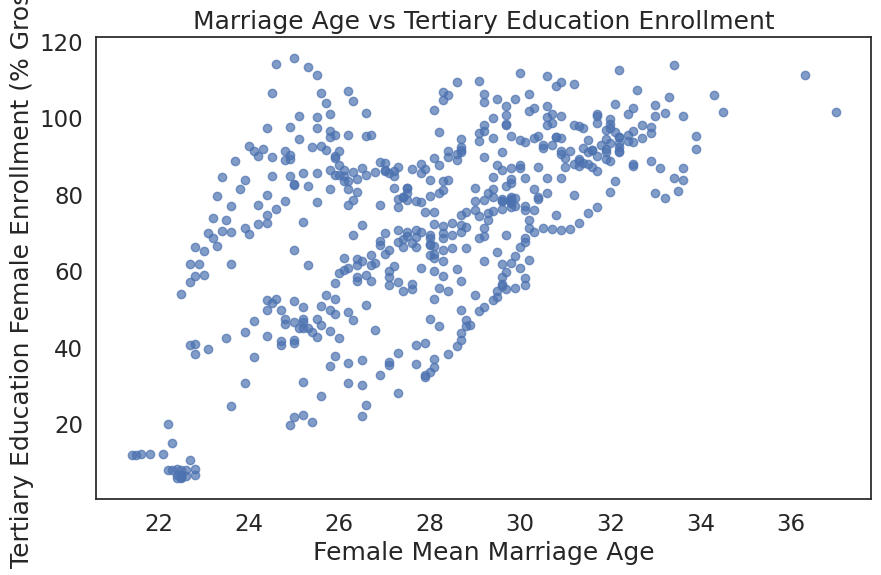

In [7]:
#Visualisations

print(df_c.columns)
df_c.head()

import matplotlib.pyplot as plt

# Plotting 'Mean_Marriage_Age' vs 'Tertiary_Education'
plt.figure(figsize=(10, 6))

# Correct column names based on df_c.columns
plt.scatter(df_c['Mean_Marriage_Age'], df_c['Tertiary_Education'], alpha=0.7)

# Adding labels and title
plt.xlabel('Female Mean Marriage Age')
plt.ylabel('Tertiary Education Female Enrollment (% Gross)')
plt.title('Marriage Age vs Tertiary Education Enrollment')

# Show the plot
plt.show()

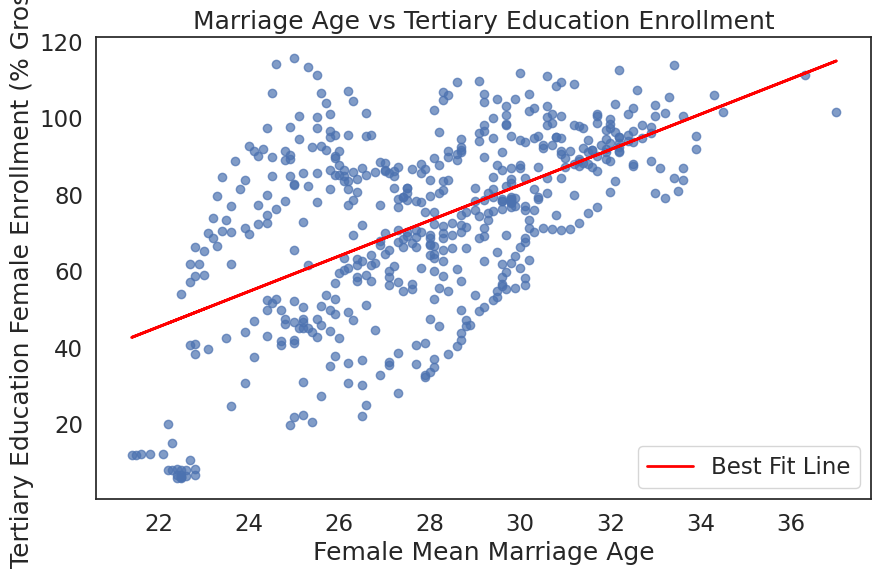

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = df_c['Mean_Marriage_Age'].values.reshape(-1, 1)  # Independent variable (reshape for single feature)
y = df_c['Tertiary_Education'].values  # Dependent variable

# Perform the linear regression
model = LinearRegression()
model.fit(X, y)

# Get the predicted values (y_hat) from the model
y_pred = model.predict(X)

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_c['Mean_Marriage_Age'], df_c['Tertiary_Education'], alpha=0.7)

# Adding the best fit line
plt.plot(df_c['Mean_Marriage_Age'], y_pred, color='red', linewidth=2, label='Best Fit Line')

# Adding labels and title
plt.xlabel('Female Mean Marriage Age')
plt.ylabel('Tertiary Education Female Enrollment (% Gross)')
plt.title('Marriage Age vs Tertiary Education Enrollment')

# Show the plot with the legend
plt.legend()
plt.show()

Plotting the dataset as a scatterplot can allow us to make qualitative comments on the general trend before performing the regression analysis. This plot shows a general positive correlation between the indepdendent variable, female mean marriage age; and the dependent variable, the female tertiary education enrolment rate. In other words, the dataset seems to show that as the mean marriage age of women increases in a country, the tertiary education enrolment rate of women also increases.

In [8]:
#Assumptions

1. Independence: Due to repeat observations of the same countries over time, independence assumption is currently violated. This can be fixed by performing a panel regression rather than linear regression, thus also accounting for space and time.
2. Homoscedasticity: Qualitative analysis of the model shows no significant heteroscedasticity across the best fit line. We can thus assume that homoscedasticity assumption is not violated.
3. Multicollinearity: Multicollinearity does not impact the results of this regression as the only independent variable accounted for is mean marriage age of women.

In [9]:
#Regression - 4th step above but I am not sure if this is necessary in our website - if we are going to include the table
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model= ols('Tertiary_Education ~ Mean_Marriage_Age', data=df_c).fit() # fit the model
print(model.summary()) # print the summary

                            OLS Regression Results                            
Dep. Variable:     Tertiary_Education   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     240.3
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           6.60e-45
Time:                        07:34:23   Log-Likelihood:                -2334.0
No. Observations:                 528   AIC:                             4672.
Df Residuals:                     526   BIC:                             4681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -56.4913      8.39

When linear regression is performed to the dataset, an R-squared value of 0.314 indicates that about 31.4% of the variance in tertiary education enrollment of women can be explained by a change in the marriage age of women. This indicates a rather low correlation between the variables. This might be due to the fact that the data is not fit for regular linear regression due to repeat observations. Thus, fixed effects regression might show a more accurate result.

The coefficient of mean marriage age being approximately 4.6 indicates a postivie relationship between the marriage age and teritary education enrollment, i.e. a higher marriage age generally indicates a higher percentage in higher education of women.



---

**Accounting for Space and Time**

First, there appears to be a generally positive relationship between mean marriage age and female enrolment in tertiary education; in other words, women that get married at an older age tend to be enrolled in higher education.

Second, we've egregiously violated the independence assumption. We have repeat observations of the same individuals (countries) over time. As such, this result may be biased unless we account for space and time.

As we saw in the lecture, panel data actually contains two sources of variation: differences between individuals (in this case, countries), and within individuals. So, a simple research question such as "Is there a relationship between Average Female Age at Marriage and Female Enrolment at Tertiary Education?" is actually two different questions:

- Does a higher Average Female Age at Marriage lead to a higher Female Enrolment at Tertiary Education between countries?
- Does an increase in the Average Female Age over time lead to an increase in higher Female Enrolment at Tertiary Education within counties?

A straighforward way of answering the first question would be to get rid of the time dimension in our data by running a separate regression for each year:

* Dependent Variable: Gender disparities in higher education (e.g., the gender ratio in tertiary education).

* Independent Variable: Average marriage age for each country.

In [10]:
#RUNNING SEPARATE REGRESSIONS FOR EACH YEAR

models=[] # create empty list to store the models
names=[] # create empty list to store the names of the models
years=df_c['Year'].unique()

for year in years: # loop through years
    yearofinterest=df_c[df_c['Year']==year] # subset the data to only include the year of interest
    model = ols('Tertiary_Education ~ Mean_Marriage_Age ', data=yearofinterest).fit()
    models.append(model) # append the model to the list of models
    names.append(str(year)) # append the name of the model to the list of names

table=summary_col( # create a regression table
    models, # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=names, # set the names of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table) # print the table


                    2000     2001     2002     2003     2004     2005     2006     2007     2008     2009     2010     2011     2012     2013     2014     2015     2016     2017     2018      2019      2020      2021   
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept         -54.075  -49.762  -46.101  -47.715  -57.734  -57.912  -45.450  -36.245  -21.881  -15.831  -10.414  -14.148  -23.252  -28.106  -32.937  -44.952  -50.424  -57.488  -66.953  -76.069** -62.480** -84.913***
                  (39.092) (41.882) (43.838) (44.842) (46.125) (48.515) (50.374) (49.592) (48.409) (51.060) (50.664) (49.959) (50.035) (50.812) (47.912) (45.104) (42.773) (41.816) (39.836) (36.355)  (28.615)  (27.223)  
Mean_Marriage_Age 4.132**  4.062**  4.027**  4.178**  4.637**  4.713**  4.290**  3.979**  3.498*   3.311*   3.112    3.

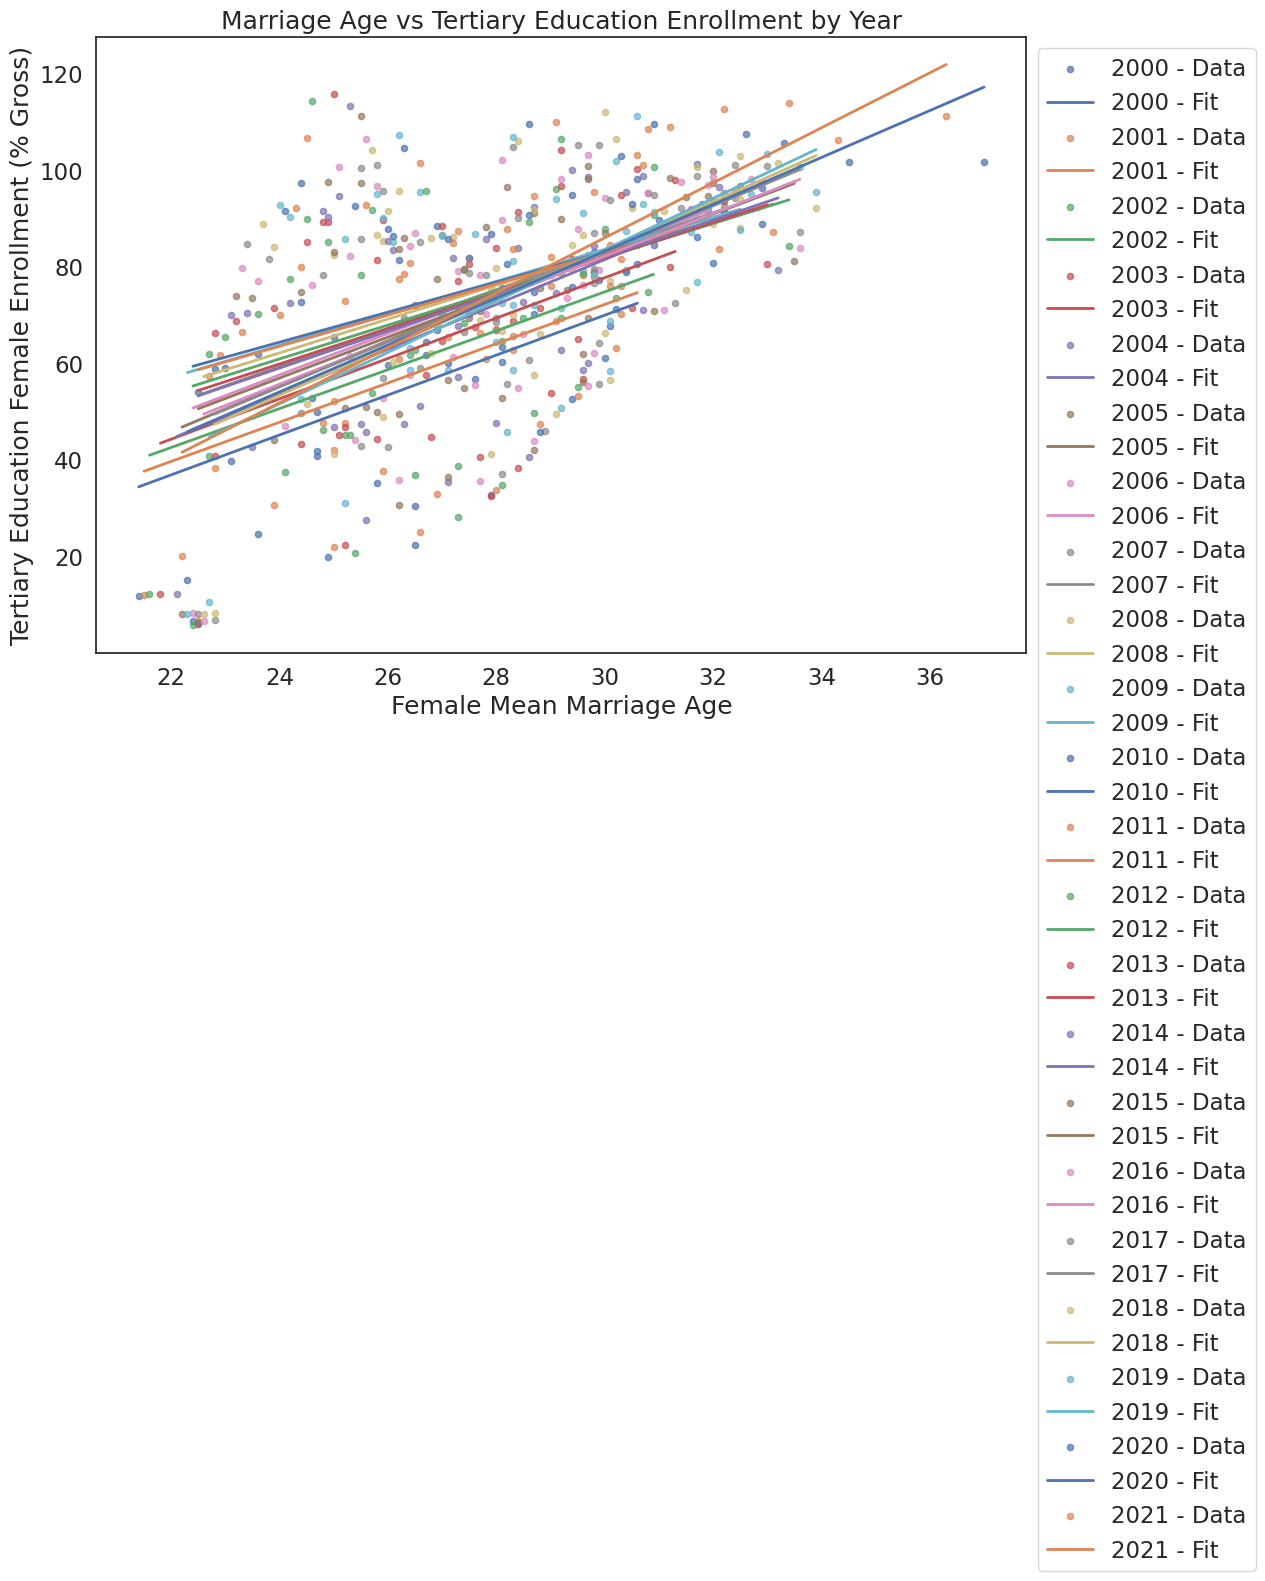

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

# Assuming your data is in df_c and you have already run the loop to generate models.

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through years and plot the best-fit line for each year
for year in years:
    # Subset the data for the current year
    yearofinterest = df_c[df_c['Year'] == year]

    # Fit the model (OLS regression)
    model = ols('Tertiary_Education ~ Mean_Marriage_Age', data=yearofinterest).fit()

    # Get the predicted values for the year
    x_vals = np.linspace(yearofinterest['Mean_Marriage_Age'].min(), yearofinterest['Mean_Marriage_Age'].max(), 100)
    y_vals = model.predict(exog=dict(Mean_Marriage_Age=x_vals))

    # Plot the scatter points for the current year
    plt.scatter(yearofinterest['Mean_Marriage_Age'], yearofinterest['Tertiary_Education'], alpha=0.7, label=f"{year} - Data", s=20)

    # Plot the best fit line
    plt.plot(x_vals, y_vals, label=f'{year} - Fit', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('Female Mean Marriage Age')
plt.ylabel('Tertiary Education Female Enrollment (% Gross)')
plt.title('Marriage Age vs Tertiary Education Enrollment by Year')

# Adding a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

**COMMENT ON THE TABLE**



---



There's a way of modeling the relationship that allows us to account for differences in between countries, while also capturing the variation within countries. This is called a **Fixed Effect regression**

> **Fixed Effects Models**: In experimental research, unmeasured differences between subjects are often controlled for via random assignment to treatment and control groups. Hence, even if a variable like Socio-Economic Status is not explicitly measured, because of random assignment, we can be reasonably confident that the effects of SES are approximately equal for all groups. Of course, random assignment is usually not possible with most survey research. If we want to control for the effect of a variable, we must explicitly measure it. If we don’t measure it, we can’t control for it. In practice, there will almost certainly be some variables we have failed to measure (or have measured poorly), so our models will likely suffer from some degree of omitted variable bias.

>When we have panel data (the same people/states/counties. etc. measured at two or more points in time) another alternative presents itself: we can use the subjects as their own controls. With panel data we can control for stable characteristics (i.e. characteristics that do not change across time) whether they are measured or not. These include such things as sex, race, and ethnicity for individuals, or urban/rural, topography, economic structure for geographic areas. The idea is that, whatever effect these variables have at one point in time, they will have the same effect at a different point in time because the values of such variables do not change.

A fixed effect regression takes the following form:

$$\huge Y_{it}=\alpha_i+\beta X_{it}+\epsilon_{it}$$

Where:
* $X_{it}$ are the independent variables (e.g. population and unemployment) whose values vary over time.
* $\beta$ is the slope coefficient for variable $x$ (e.g. unemployment). The model assumes that these effects are time-invariant, e.g. the effect of $x$ is the same at same 1 as it is at time 4 (although the value of $x$ can be different at different time periods).
* $\alpha_i$ and $\epsilon_{it}$ are both error terms. $\epsilon_{it}$ is different for each individual at each point in time. $\alpha_i$ only varies across individuals but not across time. We can think of $\alpha_i$ as representing the effects of all the time invariant/stable variables that have NOT been included in the model. So, given that we have 6 time periods for each county then the six records for county 1 would all have the same value for $\alpha_1$, the six records for county 2 would all have the same value for $\alpha_2$, etc. But, $\epsilon_{it}$ is free to be different for every case at every time period.

A fixed effect regression allows us to account for $\alpha_i$ through a technique called **demeaning**

>**Demeaning**: After demeaning, all variables for all cases have a mean of 0. That means that all the between-subject variability has been eliminated. All that is left is the within-subject variability. So, with a fixed effects model, we are analyzing what causes individual’s values to change across time. Variables whose values do not change (like race or gender) cannot cause changes across time (unless their effects change across time as well). However, whatever effect they have at one time is the same effect that they have at other times, so the effects of such stable characteristics are controlled.

In essence, you can picture this as allowing you to draw a separate regression line through each set of observations from the same group in your data (in this case, one county over time); however, while the *intercept* of these lines can vary (their absolute position), they will all have the same *slope* and will therefore be parallel. This is important, as we want to find one slope-- one common effect of x-- that fits *all* groups.

In [11]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.formula.api as smf
from linearmodels.panel import compare

df_c=df_c.set_index(['Country','Year']) # set the index to the country and the year
panel = PanelOLS.from_formula('Tertiary_Education ~ 1  + Mean_Marriage_Age + EntityEffects',df_c).fit() # run a fixed effects model
#Tertiary_Education: This is the dependent variable (what we're trying to explain), which is the Female Enrolment in Tertiary Education in each county and year.
#1: This represents the intercept term in the regression.
#Mean_Marriage_Age: This is an independent variable, the country's Average Female Age at Marriage.
#EntityEffects: This is crucial for fixed effects. It tells the model to include fixed effects for each country. This controls for time-invariant differences between countries.

print(compare({'Fixed Effects': panel,}, stars=True)) # print the model formatted as a regression table

#In summary, this code snippet is performing a fixed effects panel regression to analyze the relationship between Tertiary_Education and Mean_Marriage_Age, while controlling for unobserved differences between countries.

               Model Comparison               
                                 Fixed Effects
----------------------------------------------
Dep. Variable               Tertiary_Education
Estimator                             PanelOLS
No. Observations                           528
Cov. Est.                           Unadjusted
R-squared                               0.3930
R-Squared (Within)                      0.3930
R-Squared (Between)                     0.2591
R-Squared (Overall)                     0.2959
F-statistic                             325.69
P-value (F-stat)                        0.0000
=====================     ====================
Intercept                           -87.147***
                                     (-9.8178)
Mean_Marriage_Age                    5.7310***
                                      (18.047)
======================= ======================
Effects                                 Entity
----------------------------------------------

T-stats repo

We can see that after accounting for fixed effects in our regression, the R-squared value has increased from 0.314 to 0.393, meaning that the fixed effects model suggests that about 39.3% of the variation in tertiary education enrolment in women can be explained by the mean marriage age of women within a country. The between R-squared being 0.2591 means that about 25.91% of variation between countries can be explained by the model. Overall, the our fixed effects model can explain 29.59% of variation in women's higher education enrollment.

The F-statistic is 325.69, which is quite high, indicating a very strong correlation between the independent variable, women's marriage age, and the dependent variable, women's tertiary education enrollment. Due to this high F-statistic value, the p value is extremely small, meaning that any correlation between the marriage age and tertiary education is extremely unlikely to have occured by chance.

The coefficient of mean marriage age being 5.73 means that for every 1 year increase in mean marriage age of women, the tertiary education enrollment is expected to increase by 5.73%. The *** next to this value indicates that this coefficient is statistically significant.

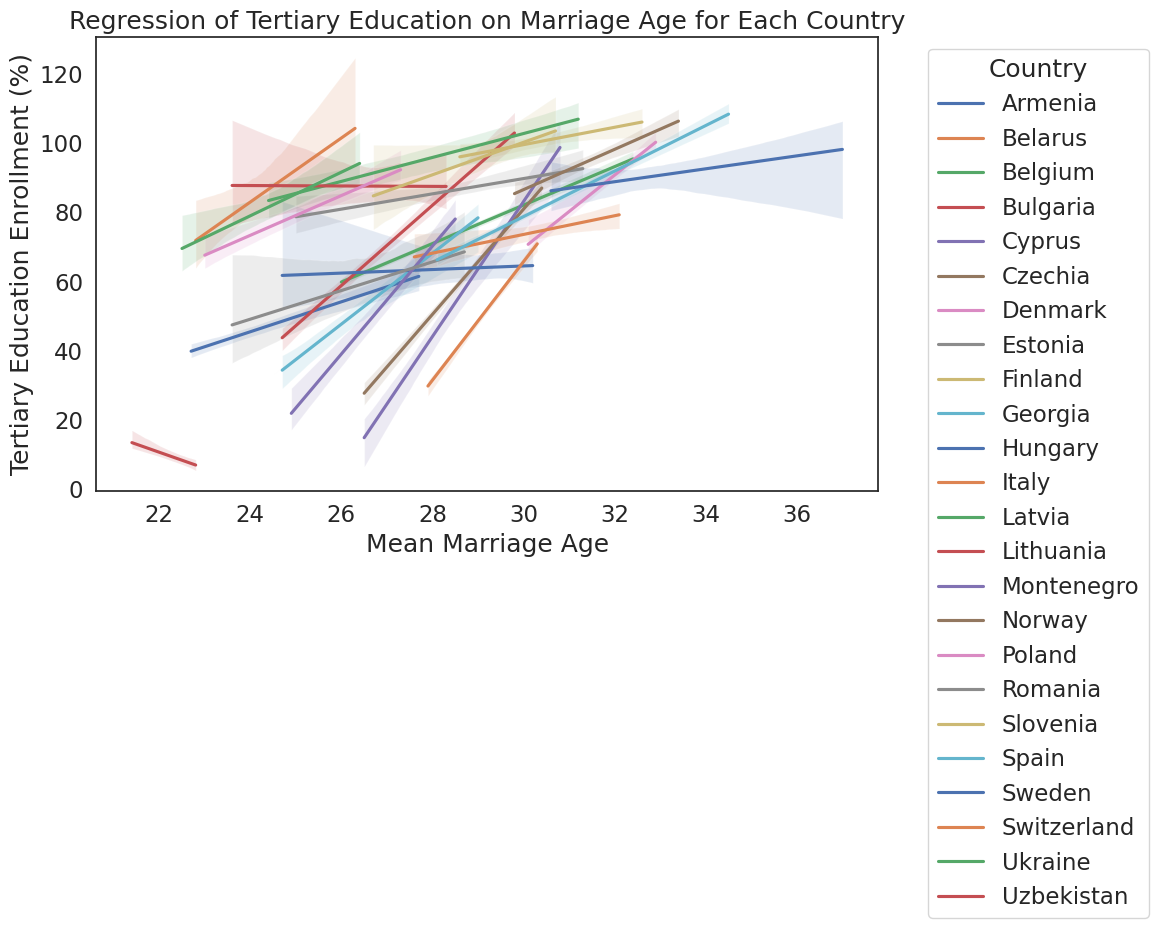

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index to turn 'Country' and 'Year' back into columns
df_c_reset = df_c.reset_index()

# Plotting the regression lines for each country
plt.figure(figsize=(12, 8))

# Loop through each country and plot the regression line for each
for country in df_c_reset['Country'].unique():
    country_data = df_c_reset[df_c_reset['Country'] == country]
    sns.regplot(x='Mean_Marriage_Age', y='Tertiary_Education', data=country_data, scatter=False, label=country)

# Adding labels and title
plt.xlabel('Mean Marriage Age')
plt.ylabel('Tertiary Education Enrollment (%)')
plt.title('Regression of Tertiary Education on Marriage Age for Each Country')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()



---



Further analysis - GDP per capita

Should we include GDP per capita as an additonal independent variable or another way?

What does it mean when we include it as an additional independent variable - explain

Explain why we are looking at GDP per capita:

By only considering marriage age and tertiary enrollment, you ignore other factors that might influence the relationship. For example:
Economic factors (e.g., income levels, poverty rates). Ignoring these factors can lead to biased estimates, as the effects of omitted variables might be incorrectly attributed to marriage age.

The relationship may differ across countries or regions due to differences in economic development, cultural norms, or education systems. A two-variable model assumes a universal relationship, which might not hold.

GDP per capita provides a measure of a country's wealth and economic development, which often correlates with education and marriage patterns.
- Checking the hypothesis: Wealthier countries tend to have higher education rates and later marriage ages.

- Adding GDP per capita helps isolate the relationship between marriage age and education by accounting for economic differences that might otherwise confound the analysis.



In [16]:
#downloading the gdp dataset
#gdp = pd.read_csv('/content/GDP per Capita.csv')
gdp = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQgyiNcx9222zCqMvQJ7UZCSag7kSavKxjncUGoMyEddceQlYzokQoE9MlwCw70zsCivCO-Qg_sD-0n/pub?output=csv')
gdp.head()

,Country,Year,GDP per Capita
0,Armenia,2000,593.450582
1,Armenia,2001,659.588989
2,Armenia,2002,742.651118
3,Armenia,2003,882.030168
4,Armenia,2004,1130.087914


In [17]:
#merging the gdp dataset with the merged dataset above, on country and year
df_extra=pd.merge(df_c,gdp, on=['Country','Year'])
df_extra.head()

,Country,Year,Mean_Marriage_Age,Tertiary_Education,GDP per Capita
0,Armenia,2000,23.1,39.588680,593.450582
1,Armenia,2001,22.8,38.302448,659.588989
2,Armenia,2002,22.7,40.783001,742.651118
3,Armenia,2003,22.8,40.810371,882.030168
4,Armenia,2004,23.5,42.608040,1130.087914


In [18]:
#unimportant - this is to avoid errors with column names
df_extra.rename(columns={'GDP per Capita': 'GDP_per_capita',
}, inplace=True)
print(df_extra.head())

   Country  Year  Mean_Marriage_Age  Tertiary_Education  GDP_per_capita
0  Armenia  2000               23.1           39.588680      593.450582
1  Armenia  2001               22.8           38.302448      659.588989
2  Armenia  2002               22.7           40.783001      742.651118
3  Armenia  2003               22.8           40.810371      882.030168
4  Armenia  2004               23.5           42.608040     1130.087914


In [19]:
models=[] # create empty list to store the models
names=[] # create empty list to store the names of the models
years=df_extra['Year'].unique()

for year in years: # loop through years
    extra_yearofinterest=df_extra[df_extra['Year']==year] # subset the data to only include the year of interest
    model = ols('Tertiary_Education ~ Mean_Marriage_Age + GDP_per_capita ', data=extra_yearofinterest).fit() # run a regression of the Tertiary_Education on Mean_Marriage_Age and GDP_per_capita
    models.append(model) # append the model to the list of models
    names.append(str(year)) # append the name of the model to the list of names

table=summary_col( # create a regression table
    models, # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=names, # set the names of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table) # print the table


                    2000     2001     2002     2003     2004     2005     2006     2007     2008     2009     2010     2011     2012     2013     2014     2015     2016     2017     2018      2019       2020      2021  
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept         -56.212  -61.946  -57.295  -53.104  -80.961  -87.695  -65.048  -53.775  -59.054  -71.184  -50.555  -56.031  -51.546  -47.111  -53.309  -69.116  -79.977  -88.626  -93.244* -103.475** -77.562** -92.108**
                  (74.156) (76.199) (77.846) (84.452) (86.226) (86.769) (89.699) (88.415) (83.725) (81.957) (75.913) (71.149) (68.641) (69.799) (65.689) (59.482) (57.042) (56.952) (53.815) (48.156)   (36.312)  (34.675) 
Mean_Marriage_Age 4.224    4.590    4.509    4.409    5.619    5.965    5.111    4.710    5.053    5.610*   4.767    4.

WHY DOES IT SHOW -0.000 FOR GDP ? it is a very small number, what does this indicate?

In [20]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.formula.api as smf
from linearmodels.panel import compare

df_extra=df_extra.set_index(['Country','Year']) # set the index to the country and the year
panel = PanelOLS.from_formula('Tertiary_Education ~ 1  + GDP_per_capita + Mean_Marriage_Age + EntityEffects',df_extra).fit() # run a fixed effects model
#Tertiary_Education: This is the dependent variable (what we're trying to explain), which is the Female Enrolment in Tertiary Education in each county and year.
#1: This represents the intercept term in the regression.
#Mean_Marriage_Age: This is an independent variable, the country's Average Female Age at Marriage.
#GDP_per_capita: This is another independent variable, the country's GDP per capita
#EntityEffects: This is crucial for fixed effects. It tells the model to include fixed effects for each country. This controls for time-invariant differences between countries.

print(compare({'Fixed Effects': panel,}, stars=True)) # print the model formatted as a regression table

#In summary, this code snippet is performing a fixed effects panel regression to analyze the relationship between Republican vote share, population, and unemployment, while controlling for unobserved differences between counties.

               Model Comparison               
                                 Fixed Effects
----------------------------------------------
Dep. Variable               Tertiary_Education
Estimator                             PanelOLS
No. Observations                           528
Cov. Est.                           Unadjusted
R-squared                               0.4010
R-Squared (Within)                      0.4010
R-Squared (Between)                     0.1843
R-Squared (Overall)                     0.2438
F-statistic                             168.02
P-value (F-stat)                        0.0000
=====================     ====================
Intercept                           -75.920***
                                     (-7.7164)
GDP_per_capita                        0.0002**
                                      (2.5836)
Mean_Marriage_Age                    5.1774***
                                      (13.567)
======================= ======================
Effects      

Endogeneity - the causal relationship may run both ways: higher educational enrollment could delay marriage, while delayed marriage might enable women to pursue higher education. -- is this a limitation or can we address this in our analysis?